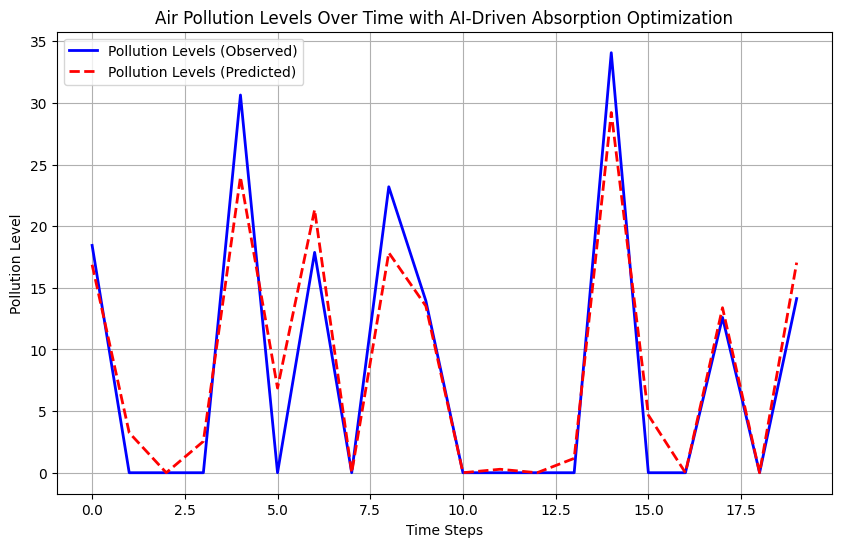

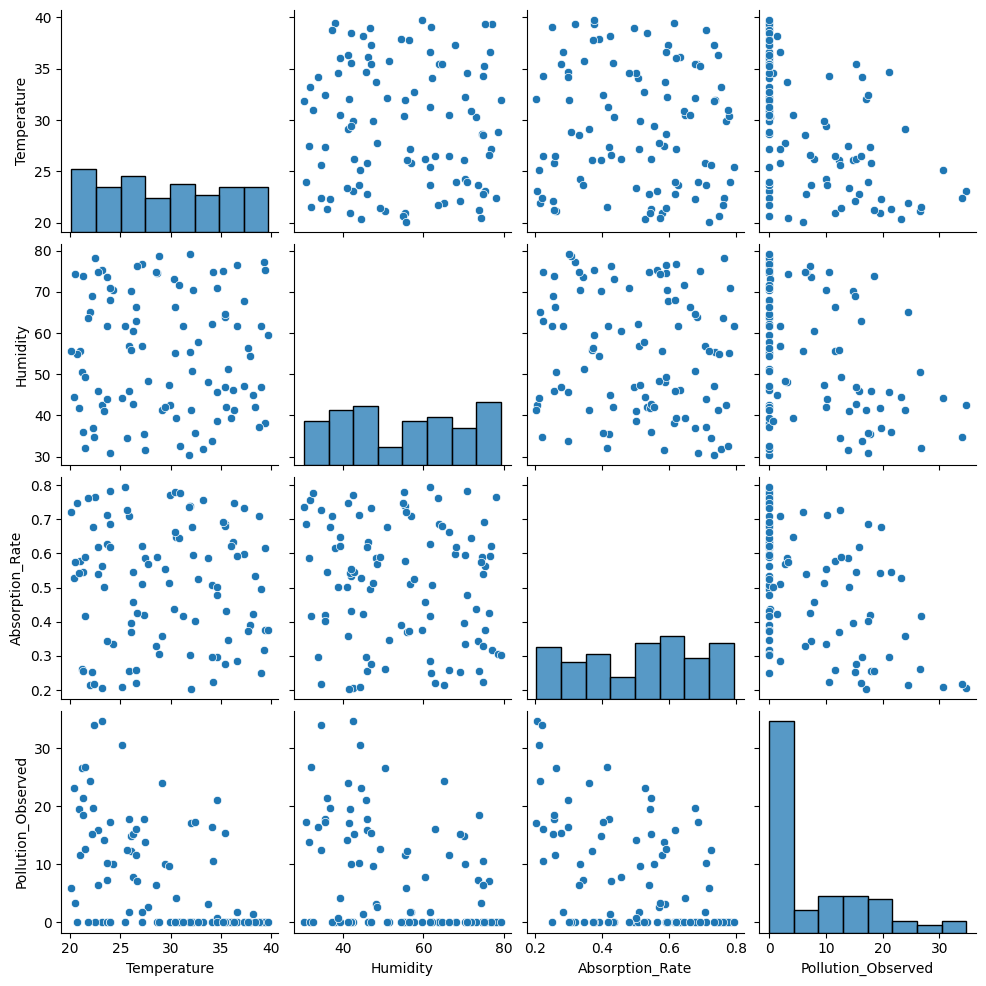

Model Coefficients (impact of each environmental factor on pollution levels):

                 Coefficient
Temperature        -0.918265
Humidity           -0.309508
Absorption_Rate   -32.631383


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


np.random.seed(42)

n_samples = 100
temperature = np.random.uniform(20, 40, n_samples)  
humidity = np.random.uniform(30, 80, n_samples)     
absorption_rate = np.random.uniform(0.2, 0.8, n_samples)  


pollution_levels_observed = 100 - (temperature * 1.5 + humidity * 0.5 + absorption_rate * 50)

pollution_levels_observed += np.random.normal(0, 5, n_samples)

pollution_levels_observed = np.maximum(0, pollution_levels_observed)


data = pd.DataFrame({
    'Temperature': temperature,
    'Humidity': humidity,
    'Absorption_Rate': absorption_rate,
    'Pollution_Observed': pollution_levels_observed
})


X = data[['Temperature', 'Humidity', 'Absorption_Rate']]
y = data['Pollution_Observed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

pollution_levels_predicted = model.predict(X_test)

pollution_levels_predicted = np.maximum(0, pollution_levels_predicted)

time_steps = np.arange(len(y_test))

plt.figure(figsize=(10, 6))
plt.plot(time_steps, y_test.values, label='Pollution Levels (Observed)', color='blue', linewidth=2)
plt.plot(time_steps, pollution_levels_predicted, label='Pollution Levels (Predicted)', color='red', linestyle='--', linewidth=2)
plt.title('Air Pollution Levels Over Time with AI-Driven Absorption Optimization')
plt.xlabel('Time Steps')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()


sns.pairplot(data, kind='scatter', diag_kind='hist')
plt.show()

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Model Coefficients (impact of each environmental factor on pollution levels):\n")
print(coefficients)

